In [1]:
import pandas as pd
from sklearn.datasets import load_wine

wine = load_wine()

df_wine = pd.DataFrame(wine.data, columns=wine.feature_names)
df_wine['Class label'] = wine.target

# 클래스 1 제외
df_wine = df_wine[df_wine['Class label'] != 1]

y = df_wine['Class label'].values
X = df_wine[['alcohol', 'od280/od315_of_diluted_wines']].values

In [2]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

le = LabelEncoder()
y = le.fit_transform(y)

X_train, X_test, y_train, y_test =\
train_test_split(X, y,
                 test_size=0.2,
                 random_state=1,
                 stratify=y)

In [3]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion='entropy',
                              max_depth=None,
                              random_state=1)

bag = BaggingClassifier(estimator=tree,
                        n_estimators=500,
                        max_samples=1.0,
                        max_features=1.0,
                        bootstrap=True,
                        bootstrap_features=False,
                        n_jobs=1,
                        random_state=1)

In [4]:
from sklearn.metrics import accuracy_score

tree = tree.fit(X_train, y_train)
y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_test)

tree_train = accuracy_score(y_train, y_train_pred)
tree_test = accuracy_score(y_test, y_test_pred)
print('결정 트리의 훈련 정확도/테스트 정확도 %.3f/%.3f' % (tree_train, tree_test))

bag = bag.fit(X_train, y_train)
y_train_pred = bag.predict(X_train)
y_test_pred = bag.predict(X_test)

bag_train = accuracy_score(y_train, y_train_pred)
bag_test = accuracy_score(y_test, y_test_pred)
print('배깅의 훈련 정확도/테스트 정확도 %.3f/%.3f' % (bag_train, bag_test))

결정 트리의 훈련 정확도/테스트 정확도 1.000/0.955
배깅의 훈련 정확도/테스트 정확도 1.000/0.955


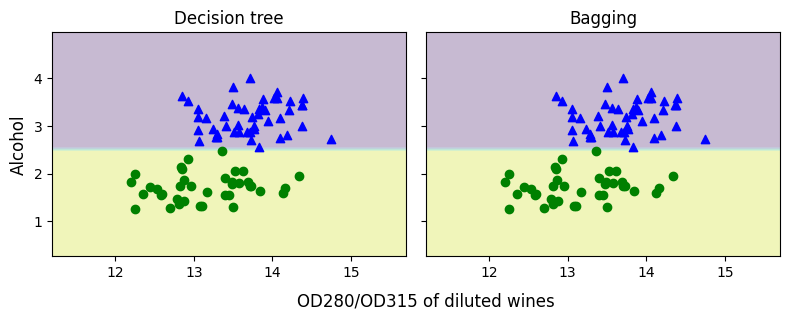

In [5]:
import numpy as np
import matplotlib.pyplot as plt

x_min = X_train[:, 0].min() - 1
x_max = X_train[:, 0].max() + 1
y_min = X_train[:, 1].min() - 1
y_max = X_train[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

f, axarr = plt.subplots(nrows=1, ncols=2,
                        sharex='col',
                        sharey='row',
                        figsize=(8, 3))

for idx, clf, tt in zip([0, 1], [tree, bag], ['Decision tree', 'Bagging']):
  clf.fit(X_train, y_train)

  Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)

  axarr[idx].contourf(xx, yy, Z, alpha=0.3)
  axarr[idx].scatter(X_train[y_train == 0, 0],
                     X_train[y_train == 0, 1],
                     c='blue', marker='^')

  axarr[idx].scatter(X_train[y_train == 1, 0],
                     X_train[y_train == 1, 1],
                     c='green', marker='o')

  axarr[idx].set_title(tt)

axarr[0].set_ylabel('Alcohol', fontsize=12)

plt.tight_layout()
plt.text(0, -0.2,

s='OD280/OD315 of diluted wines',
ha='center',
va='center',
fontsize=12,
transform=axarr[1].transAxes)

plt.show()

# **MNIST 데이터셋으로 배깅을 이용한 모델 학습**

In [6]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist["data"], mnist["target"].astype(np.int32)

In [7]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=100)
X_pca = pca.fit_transform(X_scaled)

X_train, X_test, y_train, y_test = train_test_split(X_pca,
                                                    y, test_size=0.2,
                                                    random_state=42)

knn_clf = KNeighborsClassifier(n_neighbors=3)
knn_clf.fit(X_train, y_train)

y_pred = knn_clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print(f"정확도: {accuracy:.4f}")

정확도: 0.9586


In [8]:
from sklearn.ensemble import AdaBoostClassifier

tree = DecisionTreeClassifier(criterion='entropy',
                              max_depth=1,
                              random_state=1)

ada = AdaBoostClassifier(estimator=tree,
                         n_estimators=500,
                         learning_rate=0.1,
                         random_state=1)

In [10]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import HistGradientBoostingClassifier
import xgboost as xgb
import lightgbm as lgb

In [14]:
data = load_breast_cancer()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

hist_model = HistGradientBoostingClassifier(random_state=42)
hist_model.fit(X_train, y_train)

xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

lgb_model = lgb.LGBMClassifier(random_state=42)
lgb_model.fit(X_train, y_train)

hgbc_train_score = hist_model.score(X_train, y_train)
hgbc_test_score = hist_model.score(X_test, y_test)
print('HistGradientBoostingClassifier 훈련 정확도/테스트 정확도: %.3f/%.3f' % (hgbc_train_score, hgbc_test_score))

xgb_train_score = xgb_model.score(X_train, y_train)
xgb_test_score = xgb_model.score(X_test, y_test)
print('XGBoost 훈련 정확도/테스트 정확도: %.3f/%.3f' % (xgb_train_score, xgb_test_score))

lgb_train_score = lgb_model.score(X_train, y_train)
lgb_test_score = lgb_model.score(X_test, y_test)
print('LightGBM 훈련 정확도/테스트 정확도: %.3f/%.3f' % (lgb_train_score, lgb_test_score))

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [04:54:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 286, number of negative: 169
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000324 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4548
[LightGBM] [Info] Number of data points in the train set: 455, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.628571 -> initscore=0.526093
[LightGBM] [Info] Start training from score 0.526093
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 